#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

Numeric Data - Summary statistics such as the mean, median, min, max, or standard deviation can show how a dataset is spread or centered. Additionally, histograms can be used to look at the distribution of a dataset. Boxplots can also be used to examine if there are outliers in the dataset, while also showing the spread.

Categorical Data - Frequency counts or bar plots can show the distribution of categories across a dataset.

Relationship Between Numeric and Categorical - Anova tests or T-Tests can show if there are significant differences across groups. Additionally, summary statistics can be used that are grouped by category to examine the spread and centrality.

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [34]:
import pandas as pd
import numpy as np


data = pd.DataFrame({
    'categorical_column': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], size=1000),
    'numeric_column_1': np.random.normal(loc=10, scale=1, size=1000),
    'numeric_column_2': np.random.normal(loc=20, scale=2, size=1000)
})

data

,categorical_column,numeric_column_1,numeric_column_2
0,J,10.103160,21.953176
1,H,8.448715,21.115959
2,A,10.573965,20.639162
3,D,9.602346,19.095692
4,G,10.596851,19.742418
...,...,...,...
995,B,10.737680,16.773570
996,C,11.081797,18.828924
997,B,9.814666,20.488600
998,E,9.494701,18.476679


In [35]:
data.describe()

,numeric_column_1,numeric_column_2
count,1000.000000,1000.000000
mean,10.008376,19.925708
std,1.016746,2.019950
min,6.338598,14.359348
25%,9.328016,18.558321
50%,10.049610,19.876855
75%,10.697953,21.352447
max,13.175204,25.856736


array([[<Axes: title={'center': 'numeric_column_1'}>,
        <Axes: title={'center': 'numeric_column_2'}>]], dtype=object)

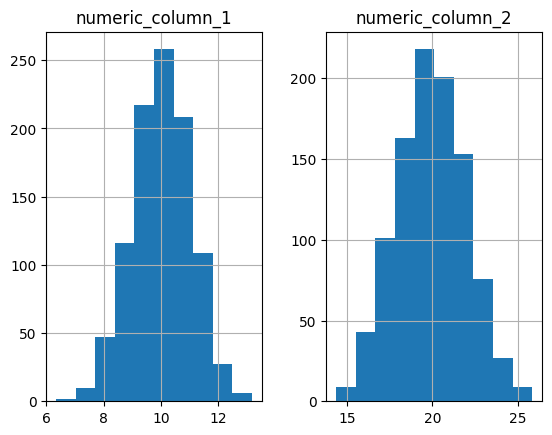

In [36]:
data.hist()

<Axes: >

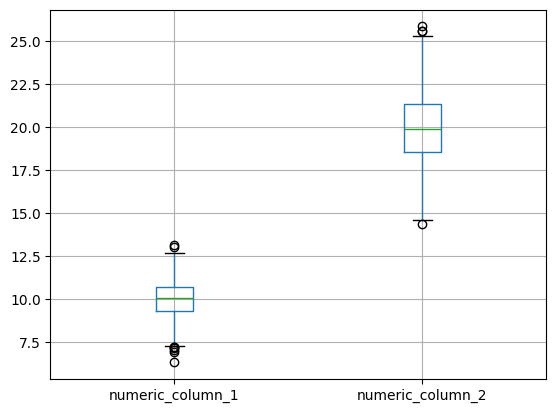

In [37]:
data.boxplot()

<Axes: xlabel='categorical_column'>

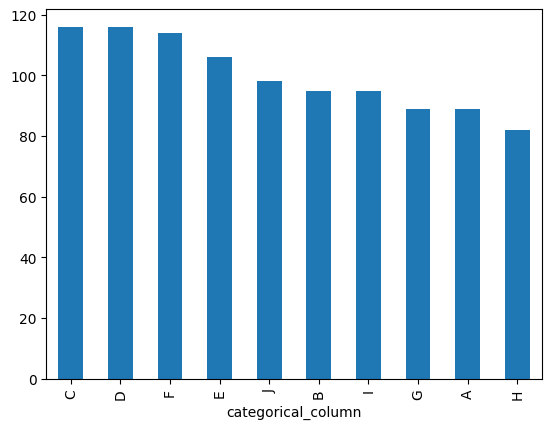

In [38]:
data['categorical_column'].value_counts().plot(kind='bar')

In [39]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(
    *[group['numeric_column_1'].values for _, group in data.groupby('categorical_column')]
)
print('numeric_column_1 F-Stat', f_stat)
print('numeric_column_1 P-Value', p_value)
f_stat, p_value = f_oneway(
    *[group['numeric_column_2'].values for _, group in data.groupby('categorical_column')]
)
print('numeric_column_2 F-Stat', f_stat)
print('numeric_column_2 P-Value', p_value)

numeric_column_1 F-Stat 2.5151392552838665
numeric_column_1 P-Value 0.007529326650878807
numeric_column_2 F-Stat 0.8985175318336626
numeric_column_2 P-Value 0.5258804818170412


In [40]:
data.groupby('categorical_column')[['numeric_column_1', 'numeric_column_2']].agg(['mean', 'median', 'std', 'min', 'max'])

numeric_column_1                                            \
                               mean     median       std       min        max   
categorical_column                                                              
A                         10.033223  10.020456  0.910069  7.806765  12.452529   
B                         10.112717  10.147615  0.922192  7.937231  12.055193   
C                         10.003236  10.094869  1.043506  7.190601  13.175204   
D                          9.909270   9.927169  1.029744  7.249829  11.949166   
E                          9.757380   9.686322  1.043823  6.338598  12.683478   
F                          9.888652   9.943043  1.103673  7.416534  12.131101   
G                         10.201094  10.353546  0.917518  7.712707  12.199242   
H                         10.030861  10.114734  0.958421  6.953840  12.234040   
I                          9.926868   9.831419  1.122916  7.238038  13.035879   
J                         10.303990  10.234635  0.966430  8.107407  12.628296   

                   numeric_column_2                                             
                               mean     median       std        min        max  
categorical_column                                                              
A                         19.511306  19.312526  1.966691  15.926677  25.856736  
B                         19.877248  20.017528  2.124314  15.862781  25.303472  
C                         20.153830  20.515084  1.978885  15.039672  25.571644  
D                         19.840242  19.834351  1.919518  15.515321  25.294799  
E                         20.059094  19.868353  2.120715  15.490895  24.824862  
F                         19.826386  19.856897  1.991698  14.629467  24.540799  
G                         19.795995  19.911199  2.042111  14.596757  23.939121  
H                         20.072849  19.936220  2.171420  14.738601  25.002616  
I                         19.935964  19.709600  1.871153  15.808789  24.516414  
J                         20.136178  20.013120  2.045774  14.359348  23.917779

#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your 'target' column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [41]:
# Creating inital dataframe with 1 categorical column and 4 numeric
data = pd.DataFrame({
    'categorical_column': np.random.choice(['A', 'B', 'C', 'D', 'E'], size=1000),
    'numeric_column_1': np.random.normal(loc=10, scale=1, size=1000),
    'numeric_column_2': np.random.normal(loc=0, scale=50, size=1000),
    'numeric_column_3': np.random.normal(loc=-25, scale=20, size=1000),
    'numeric_column_4': np.random.normal(loc=50, scale=3, size=1000)
})

# Making 5% of data in each column null
rng = np.random.default_rng()
for col in data.columns:
    nulls = rng.choice(data.index, size=50, replace=False)
    data.loc[nulls, col] = np.nan

# Creating Target Column
categorical_effects = {'A': 2, 'B': -2, 'C': 1, 'D': -1, 'E': 0}
target = (
    data['numeric_column_1'].fillna(0) * 0.5 +
    data['numeric_column_2'].fillna(0) * -0.01 +
    data['numeric_column_3'].fillna(0) * 0.75 +
    data['numeric_column_4'].fillna(0) * -2 +
    data['categorical_column'].map(categorical_effects).fillna(0) +
    rng.normal(0, 1, len(data))
)
data['target'] = target > np.mean(target)

data

,categorical_column,numeric_column_1,numeric_column_2,numeric_column_3,numeric_column_4,target
0,E,8.353460,0.316288,-2.152113,52.804159,True
1,C,9.245360,20.650699,NaN,47.013741,True
2,A,11.367008,NaN,-21.681537,50.570907,False
3,D,11.443079,-14.203657,-13.164930,53.043421,False
4,C,9.447362,22.288049,-5.398518,52.992056,True
...,...,...,...,...,...,...
995,A,8.967442,-144.207070,-48.952085,50.025029,False
996,D,10.958824,94.189891,-49.726081,51.738538,False
997,NaN,10.016692,-85.441334,-7.233813,49.124874,True
998,D,10.541341,46.836063,-39.151840,50.767797,False


In [42]:
data.describe()

,numeric_column_1,numeric_column_2,numeric_column_3,numeric_column_4
count,950.000000,950.000000,950.000000,950.000000
mean,9.967344,-0.637641,-23.717765,50.111090
std,0.977474,49.596858,20.270939,2.956653
min,6.637291,-163.669339,-84.048918,40.358741
25%,9.293973,-33.756702,-37.231464,48.090967
50%,9.924703,-1.592930,-23.999479,50.141814
75%,10.598436,34.090440,-9.667775,52.139186
max,12.747514,156.094074,48.701934,61.848837


<Axes: xlabel='categorical_column'>

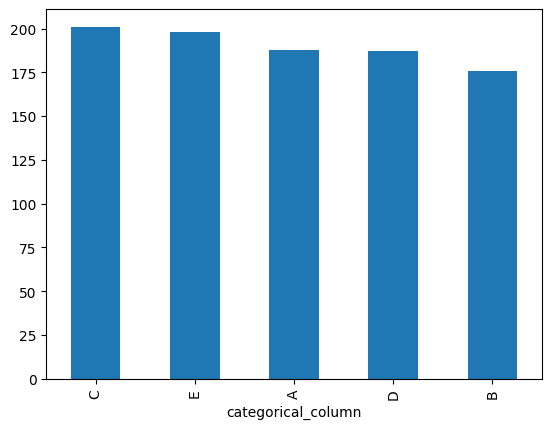

In [43]:
data['categorical_column'].value_counts().plot(kind='bar')

In [44]:
f_stat, p_value = f_oneway(
    *[group['numeric_column_1'].dropna().values for _, group in data.groupby('categorical_column')]
)
print('numeric_column_1 F-Stat', f_stat)
print('numeric_column_1 P-Value', p_value)

f_stat, p_value = f_oneway(
    *[group['numeric_column_2'].dropna().values for _, group in data.groupby('categorical_column')]
)
print('numeric_column_2 F-Stat', f_stat)
print('numeric_column_2 P-Value', p_value)

f_stat, p_value = f_oneway(
    *[group['numeric_column_3'].dropna().values for _, group in data.groupby('categorical_column')]
)
print('numeric_column_3 F-Stat', f_stat)
print('numeric_column_3 P-Value', p_value)

f_stat, p_value = f_oneway(
    *[group['numeric_column_4'].dropna().values for _, group in data.groupby('categorical_column')]
)
print('numeric_column_4 F-Stat', f_stat)
print('numeric_column_4 P-Value', p_value)

numeric_column_1 F-Stat 2.223612131853007
numeric_column_1 P-Value 0.06468166414101918
numeric_column_2 F-Stat 0.19452113570752375
numeric_column_2 P-Value 0.9412920511947602
numeric_column_3 F-Stat 2.2296496488064417
numeric_column_3 P-Value 0.06405392405567571
numeric_column_4 F-Stat 0.8962744255553032
numeric_column_4 P-Value 0.46552887791804964


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [45]:
# --- Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def run_classifier(df,classifier):
    # Separate features/target
    y = df['target'].astype(int)  # logistic expects numeric; 0/1 from boolean
    X = df.drop(columns=['target'])

    #You fill in the pipeline definition.  Make sure to:
    # - process categorical features (using an imputer and one hot encoder)
    # - process numeric features (using an imputer and StandardScaler)
    # - define your pipeline using `pipeline = ...`

    numeric_features = X.select_dtypes(include=[np.number]).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    preprocessor = ColumnTransformer([
        ('num', Pipeline([('imputer', SimpleImputer()), ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='constant')), ('onehot', OneHotEncoder())]), categorical_features)
    ])
    pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', classifier)])

    # --- 5-fold CV using F1
    return cross_val_score(pipeline, X, y, scoring='f1', cv=5)


scores = run_classifier(data,LogisticRegression(random_state=42))
print(f'F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}')
print('Fold scores:', np.round(scores, 3))

F1 (5-fold): mean=0.861, std=0.019
Fold scores: [0.854 0.828 0.882 0.867 0.873]


Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [46]:
# Your code here
from sklearn.ensemble import RandomForestClassifier
scores = run_classifier(data,RandomForestClassifier())
print(f'F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}')
print('Fold scores:', np.round(scores, 3))

F1 (5-fold): mean=0.901, std=0.018
Fold scores: [0.927 0.869 0.901 0.905 0.901]


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

With my data, the Random Forest Classifier outperformed logisitc regression. Random Forest achieved an average F1 score of 0.9 whereas logistic regression only scores an average of 0.849. Random Forest is able to capture nonlinear interactions between features and the target, whereas logistic regression assumes that there is a linear relationship between the features and the target variable. Additionally, random forest is able to inherently capture feature splits and interactions as it builds out trees.